### PACKAGES 

In [1]:
# importing packages 
import tensorflow as tf 
import keras 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

2022-07-01 11:22:26.771749: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-07-01 11:23:07.038809: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-01 11:23:07.040194: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-07-01 11:23:07.150143: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:61:00.0 name: NVIDIA GeForce GTX 1660 computeCapability: 7.5
coreClock: 1.785GHz coreCount: 22 deviceMemorySize: 5.80GiB deviceMemoryBandwidth: 178.86GiB/s
2022-07-01 11:23:07.150232: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-07-01 11:23:07.342397: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-07-01 11:23:07.342618: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.1

### DATA

In [54]:
# loading data 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

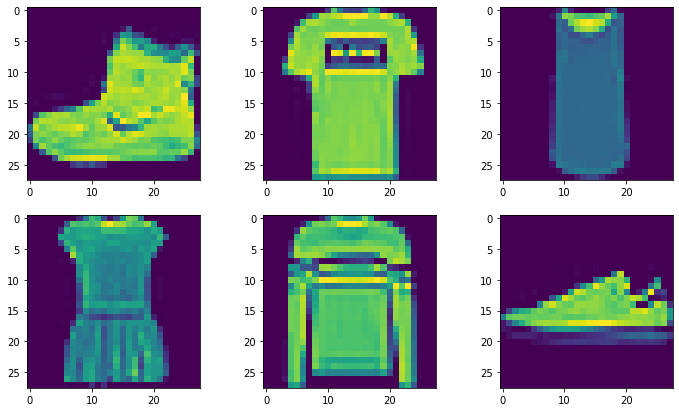

In [13]:

plt.figure(figsize=(12,7))

plt.subplot(231)
plt.imshow(X_train[0])

plt.subplot(232)
plt.imshow(X_train[1])

plt.subplot(233)
plt.imshow(X_train[2])

plt.subplot(234)
plt.imshow(X_train[3])

plt.subplot(235)
plt.imshow(X_train[5])

plt.subplot(236)
plt.imshow(X_train[6])



In [55]:
# We are flattening images cause we start with a simplemodel 
X_train_std = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_std = X_test.reshape(X_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### SIMPLE CNN MODEL  

In [15]:
# difyning model
model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compiling model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


2022-07-01 11:35:23.783743: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-01 11:35:23.784365: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-01 11:35:23.784840: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:61:00.0 name: NVIDIA GeForce GTX 1660 computeCapability: 7.5
coreClock: 1.785GHz coreCount: 22 deviceMemorySize: 5.80GiB deviceMemoryBandwidth: 178.86GiB/s
2022-07-01 11:35:23.784881: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-07-01 11:35:23.784920: I tensorflow/stream_executor/plat

In [56]:
history = model.fit(X_train_std, y_train, epochs=20, batch_size=256, verbose=1, validation_split=0.1)

Epoch 1/20
211/211 [==============================] - 1s 3ms/step - loss: 0.3634 - accuracy: 0.8725 - val_loss: 0.3886 - val_accuracy: 0.8593
Epoch 2/20
211/211 [==============================] - 1s 3ms/step - loss: 0.3602 - accuracy: 0.8740 - val_loss: 0.3886 - val_accuracy: 0.8600
Epoch 3/20
211/211 [==============================] - 1s 3ms/step - loss: 0.3583 - accuracy: 0.8738 - val_loss: 0.3900 - val_accuracy: 0.8623
Epoch 4/20
211/211 [==============================] - 1s 3ms/step - loss: 0.3562 - accuracy: 0.8750 - val_loss: 0.3901 - val_accuracy: 0.8607
Epoch 5/20
211/211 [==============================] - 1s 3ms/step - loss: 0.3533 - accuracy: 0.8748 - val_loss: 0.3946 - val_accuracy: 0.8612
Epoch 6/20
211/211 [==============================] - 1s 3ms/step - loss: 0.3524 - accuracy: 0.8760 - val_loss: 0.3815 - val_accuracy: 0.8600
Epoch 7/20
211/211 [==============================] - 1s 3ms/step - loss: 0.3496 - accuracy: 0.8770 - val_loss: 0.3913 - val_accuracy: 0.8608
Epoch 

In [57]:
# model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                130       
Total params: 12,894
Trainable params: 12,894
Non-trainable params: 0
_________________________________________________________________


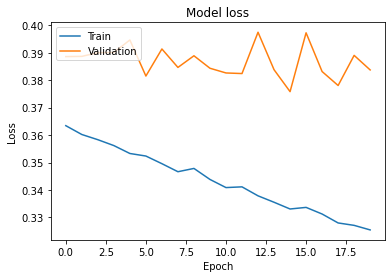

In [58]:
# visualizing loss 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Validation'], loc='upper left') 
plt.show()

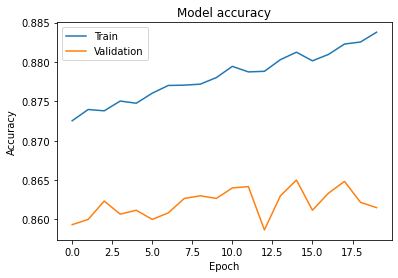

In [59]:
# plotting accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# test accuracy 

_, test_accuracy = model.evaluate(X_test_std, y_test)

print(test_accuracy)



313/313 [==============================] - 1s 2ms/step - loss: 0.4094 - accuracy: 0.8554
0.855400025844574


### PREDICTION 

In [20]:
list_label_name=['Tshirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
dict_label = dict(zip(range(10),list_label_name))
dict_label

{0: 'Tshirt',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

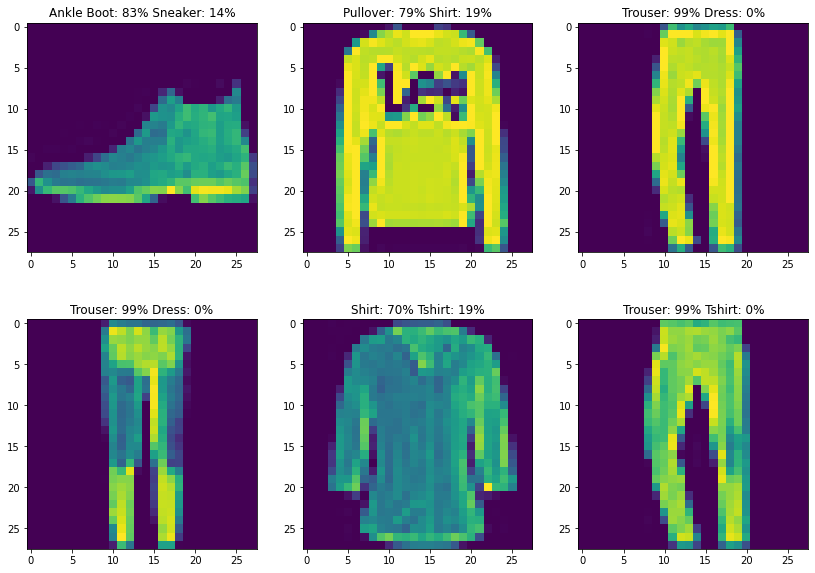

In [78]:
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes_flat = axes.flatten()
for i in range(6):
    image=X_test[i]
    axes_flat[i].imshow(image)
    y_pred = model.predict(X_test_std[[i]])[0]
    idx = np.argsort(y_pred)[-2:][::-1]
    prediction = f'{dict_label[idx[0]]}: {int(y_pred[idx[0]]*100)}% {dict_label[idx[1]]}: {int(y_pred[idx[1]]*100)}%'
    axes_flat[i].set_title(prediction)
plt.show()